### An EDA of the Melbourne Housing snapshot dataset from kaggle to demonstrate the 11 blocks of code you can use to perform a satisfactory exploratory data analysis. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('melb_data.csv')

In [3]:
data.shape

(13580, 21)

In [4]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


The column names and their definitions

In [6]:
pd.set_option('display.max_colwidth',None)
vars = pd.read_excel('variable definitions.xlsx')
vars

,Column name,Definition
0,Rooms:,Number of rooms
1,Price:,Price in dollars
2,Method:,S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
3,Type:,"br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential."
4,SellerG:,Real Estate Agent
5,Date:,Date sold
6,Distance:,Distance from CBD
7,Regionname:,"General Region (West, North West, North, North east …etc)"
8,Propertycount:,Number of properties that exist in the suburb.
9,Bedroom2 :,Scraped # of Bedrooms (from different source)


#### Numerical distributions

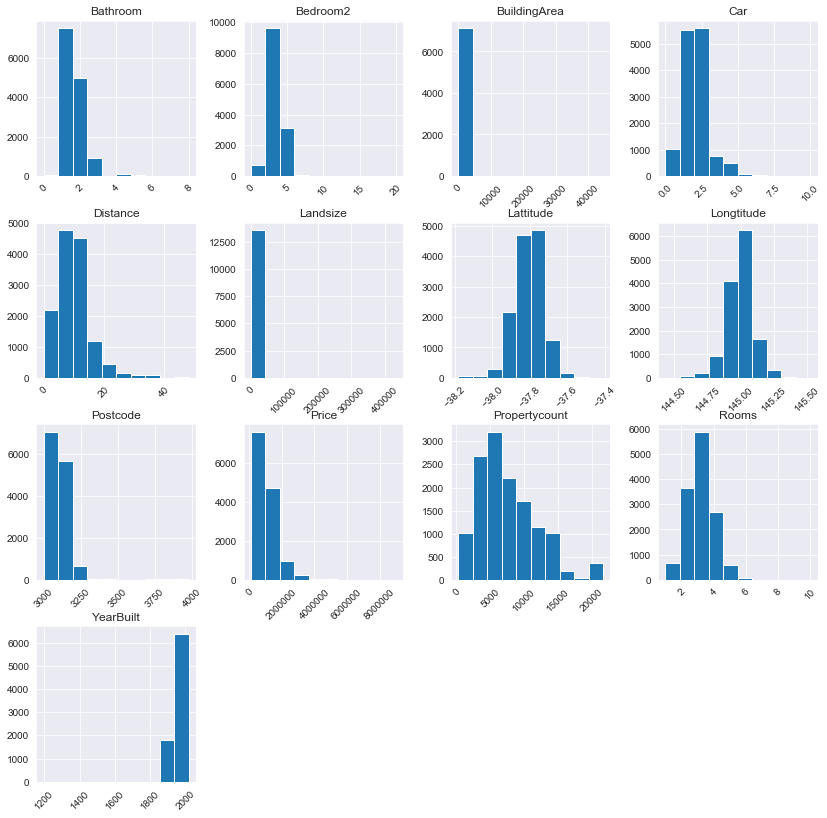

In [7]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [8]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Boxplots of the numeric features with potential outliers

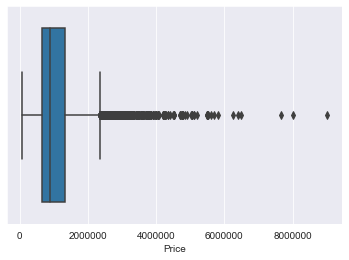

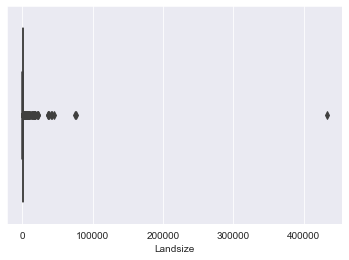

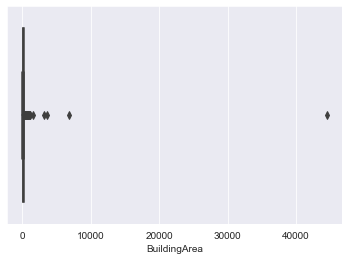

In [9]:
cols = ['Price','Landsize','BuildingArea']
for col in cols:
    sns.boxplot(col, data=data)
    plt.show()

We see that Landsize and Buildingarea each have an outlier that is very far off from the other values.

#### Categorical distributions

In [10]:
data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,53 William St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


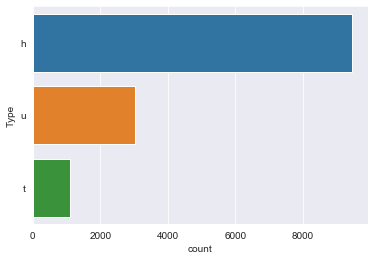

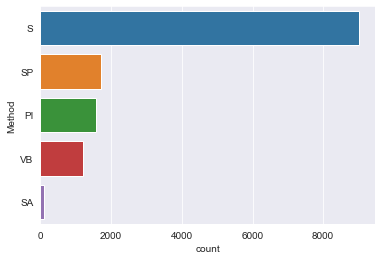

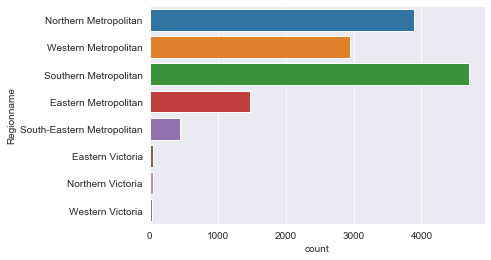

In [11]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

### Segmentation

Boxplots of categorical features by the price

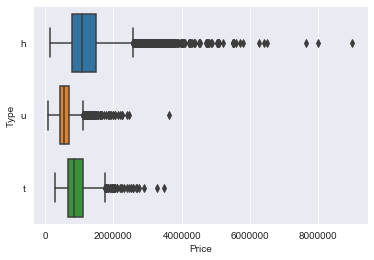

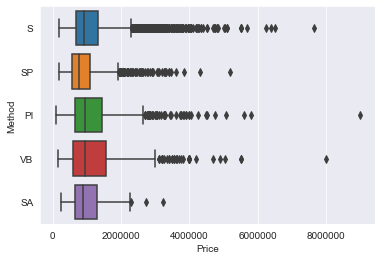

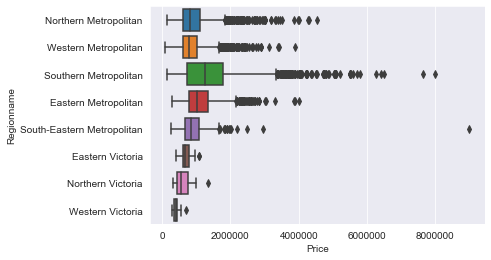

In [12]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.boxplot(y=column, x='Price', data=data)
        plt.show()

### Groupby

In [13]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).agg(['mean','std']))

Rooms                   Price                  Distance            \
          mean       std          mean            std       mean       std   
Type                                                                         
h     3.260874  0.851230  1.242665e+06  668078.742092  10.979479  6.165342   
t     2.837522  0.672654  9.337351e+05  395038.245773   9.851346  4.447395   
u     1.963871  0.629477  6.051275e+05  260987.452871   7.607391  4.476486   

         Postcode             Bedroom2            Bathroom            \
             mean        std      mean       std      mean       std   
Type                                                                   
h     3104.080643  98.449697  3.229336  0.879248  1.613822  0.732533   
t     3100.777379  72.529381  2.814183  0.679924  1.809695  0.599232   
u     3110.797481  68.361249  1.966523  0.628569  1.183295  0.411875   

           Car              Landsize              BuildingArea              \
          mean       std        mean          std         mean         std   
Type                                                                         
h     1.771222  1.054672  617.181924  4676.480273   176.866248  650.556175   
t     1.555655  0.574268  279.606822   655.849853   140.046323  147.917217   
u     1.128358  0.505223  477.314219  1728.507195    80.737121   50.631211   

        YearBuilt             Lattitude            Longtitude            \
             mean        std       mean       std        mean       std   
Type                                                                      
h     1954.081176  38.057215 -37.803795  0.084190  144.994700  0.114452   
t     1998.988189  20.404481 -37.815782  0.075767  144.996489  0.087462   
u     1980.016708  24.957520 -37.823710  0.060363  144.996363  0.068971   

     Propertycount               
              mean          std  
Type                             
h      7259.025505  4372.706394  
t      7094.459605  3981.676980  
u      8199.280080  4455.089348

Rooms                   Price                  Distance            \
            mean       std          mean            std       mean       std   
Method                                                                         
PI      3.077366  1.100700  1.133242e+06  730999.729516   9.482097  4.718632   
S       2.941809  0.894653  1.087327e+06  613785.634739  10.431523  5.978921   
SA      3.010870  0.907776  1.025772e+06  547952.730240  12.385870  7.306516   
SP      2.795655  0.978886  8.998924e+05  509987.899525  10.374692  6.476757   
VB      2.924103  1.125695  1.166510e+06  805411.614931   8.273728  4.832433   

           Postcode              Bedroom2            Bathroom            \
               mean         std      mean       std      mean       std   
Method                                                                    
PI      3106.742327   73.631725  3.062660  1.170073  1.714194  0.813059   
S       3106.171359   88.955408  2.914875  0.895283  1.498781  0.655106   
SA      3132.304348  136.249024  3.010870  0.919801  1.554348  0.685231   
SP      3096.480916  116.766616  2.785672  0.983641  1.456254  0.643366   
VB      3107.337781   74.690548  2.896580  1.123128  1.675563  0.790593   

             Car              Landsize               BuildingArea              \
            mean       std        mean           std         mean         std   
Method                                                                          
PI      1.703918  1.006568  521.682864    833.021478   158.783107   99.203980   
S       1.602581  0.944458  531.129905   1512.214413   155.781647  672.408128   
SA      1.769231  0.817543  699.532609   1516.261368   151.454318   99.549533   
SP      1.560472  0.983198  469.346447    635.464374   128.631366   70.088487   
VB      1.602359  1.011866  927.331943  12707.507836   152.419093  106.053772   

          YearBuilt             Lattitude            Longtitude            \
               mean        std       mean       std        mean       std   
Method                                                                      
PI      1965.621106  37.047066 -37.814429  0.070983  145.001865  0.091015   
S       1963.382091  35.945601 -37.808204  0.081956  144.997012  0.105528   
SA      1979.340000  29.532141 -37.818112  0.093876  145.023262  0.132737   
SP      1968.742958  35.292047 -37.804809  0.080340  144.972983  0.115776   
VB      1965.464807  47.941860 -37.815460  0.064030  145.002459  0.080346   

       Propertycount               
                mean          std  
Method                             
PI       7749.644501  4277.747352  
S        7496.049435  4447.414670  
SA       6945.902174  4190.494264  
SP       7093.759248  4368.763172  
VB       7307.331943  3961.228092

Rooms                   Price                 \
                                mean       std          mean            std   
Regionname                                                                    
Eastern Metropolitan        3.322230  0.914458  1.104080e+06  467417.860272   
Eastern Victoria            3.396226  0.630617  6.999808e+05  165498.190135   
Northern Metropolitan       2.755527  0.891448  8.981711e+05  443967.693818   
Northern Victoria           3.560976  0.807737  5.948293e+05  217761.670461   
South-Eastern Metropolitan  3.360000  0.803223  9.229438e+05  506525.336100   
Southern Metropolitan       2.860916  1.044614  1.372963e+06  822529.158614   
Western Metropolitan        3.023406  0.844428  8.664205e+05  394144.700287   
Western Victoria            3.406250  0.665237  3.975234e+05   86211.956532   

                             Distance               Postcode              \
                                 mean       std         mean         std   
Regionname                                                                 
Eastern Metropolitan        13.901088  4.312101  3111.162475   25.965495   
Eastern Victoria            34.209434  6.142984  3567.584906  331.906812   
Northern Metropolitan        8.078329  5.020135  3071.360925   72.109498   
Northern Victoria           33.748780  9.170281  3418.707317  229.039761   
South-Eastern Metropolitan  23.813556  7.236555  3225.255556  172.740079   
Southern Metropolitan        8.756656  3.720828  3156.714590   35.228621   
Western Metropolitan        10.104579  4.152871  3031.781208   48.577742   
Western Victoria            30.753125  1.540210  3337.687500    0.644455   

                            Bedroom2            Bathroom                 Car  \
                                mean       std      mean       std      mean   
Regionname                                                                     
Eastern Metropolitan        3.313392  0.912694  1.698844  0.726368  1.792916   
Eastern Victoria            3.396226  0.630617  1.811321  0.760986  2.056604   
Northern Metropolitan       2.734190  0.899294  1.367866  0.584488  1.454123   
Northern Victoria           3.560976  0.807737  1.853659  0.572755  1.925000   
South-Eastern Metropolitan  3.355556  0.810718  1.657778  0.659516  2.044444   
Southern Metropolitan       2.835144  1.068829  1.624068  0.765060  1.576264   
Western Metropolitan        2.990502  0.833986  1.501018  0.636786  1.696392   
Western Victoria            3.406250  0.665237  1.468750  0.507007  1.843750   

                                         Landsize               BuildingArea  \
                                 std         mean           std         mean   
Regionname                                                                     
Eastern Metropolitan        0.864764   634.133923    429.341067   178.001521   
Eastern Victoria            1.133665  2949.698113  11468.190530   183.645000   
Northern Metropolitan       0.982934   568.948072   7010.074541   124.177723   
Northern Victoria           1.095152  3355.463415   9495.868734  1746.374286   
South-Eastern Metropolitan  1.032987   613.991111    371.103513   162.734296   
Southern Metropolitan       0.886275   509.252183   1457.210080   153.580962   
Western Metropolitan        1.033847   493.606852   1125.854310   144.697623   
Western Victoria            0.846601   655.500000    245.501987   134.683810   

                                           YearBuilt             Lattitude  \
                                    std         mean        std       mean   
Regionname                                                                   
Eastern Metropolitan         263.464882  1971.859903  35.342712 -37.788820   
Eastern Victoria             108.954623  1984.032258  21.488732 -37.959292   
Northern Metropolitan        101.805098  1962.764286  39.875936 -37.747258   
Northern Victoria           8382.051281  1986.666667  22.189741 -37.599620   
South-Eastern Me

### Correlations

In [14]:
corrs = data.corr()
corrs

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


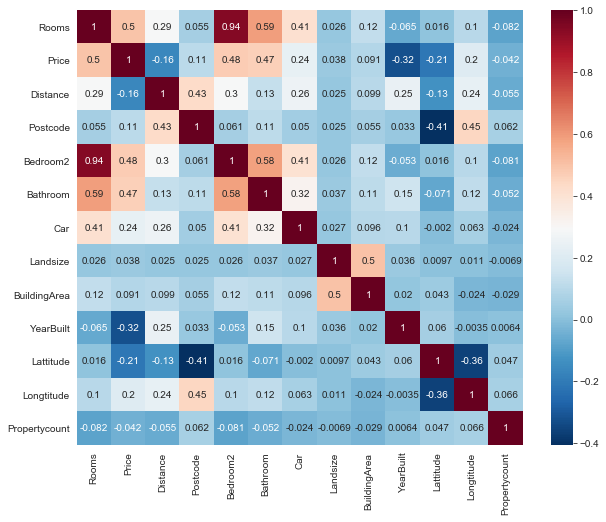

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()